    100% |████████████████████████████████| 563kB 8.5MB/s eta 0:00:01
  Running setup.py bdist_wheel for citipy ... done
  Stored in directory: /Users/tigranzohrabyan/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Creating the date
now = datetime.datetime.now()
time_now = (now.year, now.month, now.day)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
time_now

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:

# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [20]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    try: 
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        #time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=ushuaia
City not found. Skipping...
Processing Record 2 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=khatanga
Processing Record 3 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=hermanus
Processing Record 4 | Georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=georgetown
Processing Record 5 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=hithadhoo
Processing Record 6 | Bang Saphan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=bang saphan
Processing Record 7 | Rundu
http://api.openweat

Processing Record 56 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=avarua
Processing Record 57 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=port alfred
Processing Record 58 | Hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=hami
City not found. Skipping...
Processing Record 59 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=butaritari
Processing Record 60 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=albany
Processing Record 61 | Saint-Denis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=saint-denis
Processing Record 62 | Pruhonice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a

Processing Record 112 | Chaohu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=chaohu
City not found. Skipping...
Processing Record 113 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=half moon bay
Processing Record 114 | Buxar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=buxar
Processing Record 115 | Gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=gat
Processing Record 116 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=taoudenni
Processing Record 117 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=cayenne
Processing Record 118 | Buguda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661

Processing Record 168 | Lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=lompoc
City not found. Skipping...
Processing Record 169 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=tuktoyaktuk
Processing Record 170 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=saldanha
Processing Record 171 | Fraserburgh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=fraserburgh
Processing Record 172 | Porto Nacional
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=porto nacional
Processing Record 173 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=port hardy
Processing Record 174 | Slave Lake
http://api.openweathermap.org/data/2.5/weat

Processing Record 224 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=okhotsk
Processing Record 225 | Bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=bonthe
City not found. Skipping...
Processing Record 226 | Te Anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=te anau
Processing Record 227 | San Quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=san quintin
Processing Record 228 | Sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=sola
Processing Record 229 | Bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=bubaque
Processing Record 230 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9

Processing Record 281 | Bang Len
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=bang len
Processing Record 282 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=talnakh
Processing Record 283 | Del Rio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=del rio
Processing Record 284 | NEDJO
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=nedjo
City not found. Skipping...
Processing Record 285 | Dickinson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=dickinson
Processing Record 286 | Shelburne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=shelburne
Processing Record 287 | Hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a

Processing Record 336 | Paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=paamiut
Processing Record 337 | Bad Aibling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=bad aibling
Processing Record 338 | Rehoboth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=rehoboth
Processing Record 339 | Mount Pleasant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=mount pleasant
Processing Record 340 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=kahului
Processing Record 341 | Masallatah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=masallatah
Processing Record 342 | Emba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9

City not found. Skipping...
Processing Record 391 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=los llanos de aridane
Processing Record 392 | Akdagmadeni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=akdagmadeni
Processing Record 393 | Kozhevnikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=kozhevnikovo
Processing Record 394 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=grand gaube
Processing Record 395 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=codrington
Processing Record 396 | Saint-Francois
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=saint-francois
Processing Record 397 | Lavrentiya
http:

Processing Record 448 | Tommot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=tommot
City not found. Skipping...
City not found. Skipping...
Processing Record 449 | Alibag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=alibag
Processing Record 450 | Tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=tura
Processing Record 451 | Villanueva de la Serena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=villanueva de la serena
Processing Record 452 | Boddam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=boddam
Processing Record 453 | Wagar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=wagar
Processing Record 454 | Trinidad
http://api.openweathermap.org/data/2.

Processing Record 503 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=kavieng
Processing Record 504 | Belozerskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=belozerskoye
Processing Record 505 | Jieshou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=jieshou
Processing Record 506 | Sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=sinnamary
Processing Record 507 | Spirit River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=spirit river
Processing Record 508 | Minsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0dc0841a183&q=minsk
Processing Record 509 | Ramshir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad5f21a84a661c9990a8b0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [23]:
# Save data frame to CSV
weather_data.to_csv(output_data_file)

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,20,AR,1544396400,25,-54.81,-68.31,60.80,12.75
1,Khatanga,68,RU,1544399393,62,71.98,102.47,-7.50,11.12
2,Hermanus,0,ZA,1544399393,97,-34.42,19.24,47.59,3.40
3,Georgetown,40,GY,1544396400,74,6.80,-58.16,80.60,9.17
4,Hithadhoo,68,MV,1544399394,100,-0.60,73.08,82.51,11.79


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

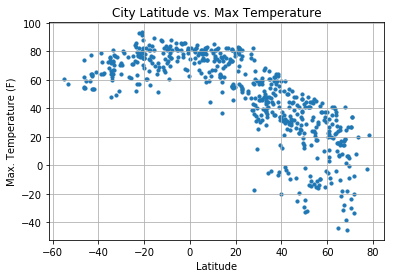

In [24]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../python_api/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

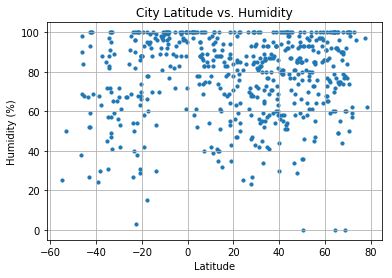

In [25]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../python_api/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

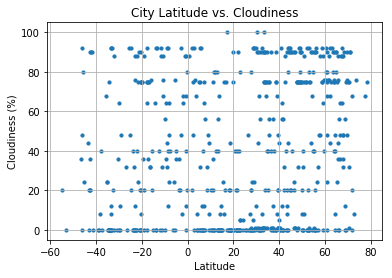

In [26]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../python_api/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

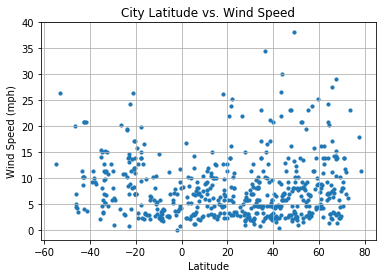

In [27]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../python_api/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()